In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataloader import split_train_val, split_test, section_loader, section_loader_ts

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
# generate splits
split_train_val(n_groups=10, split_test=0.3, loc='data/')
split_test(split='test1', loc='data/')
split_test(split='test2', loc='data/')

### Load dataset throught generator

In [3]:
val_loader_i = section_loader(direct='i', split='val', loc='data/')
val_loader_x = section_loader(direct='x', split='val', loc='data/')

In [4]:
for batch in val_loader_i.generator():
    x1, y1 = batch
    print(x1.shape, y1.shape)
    
    break

(688, 256, 1) (688, 256, 6)


In [5]:
for batch in val_loader_x.generator():
    x2, y2 = batch
    print(x2.shape, y2.shape)
    
    break

(400, 256, 1) (400, 256, 6)


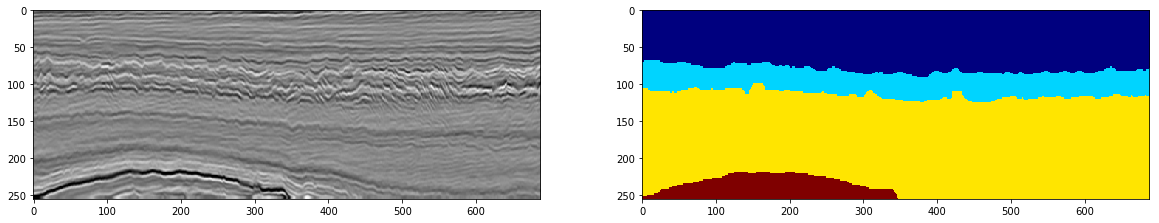

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
axs[0].imshow(x1[:,:,0].T, cmap='gray')
axs[1].imshow(np.argmax(y1,axis=-1).T, cmap='jet')
plt.show()

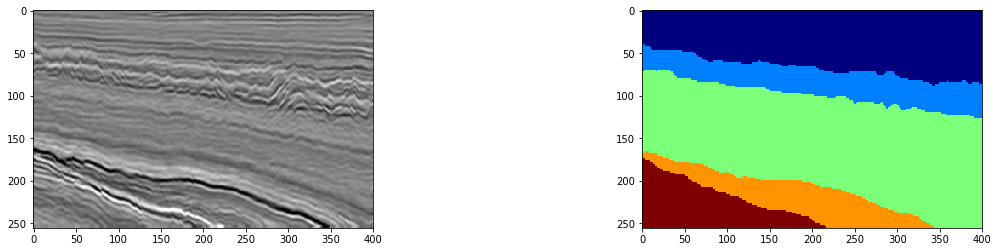

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
axs[0].imshow(x2[:,:,0].T, cmap='gray')
axs[1].imshow(np.argmax(y2,axis=-1).T, cmap='jet')
plt.show()

### Timeseries generator

In [8]:
val_loader_i_ts = section_loader_ts(direct='i', split='val', window=5, loc='data/')

In [9]:
for batch in val_loader_i_ts.generator():
    x1, y1 = batch
    print(x1.shape, y1.shape)
    break

(5, 688, 256, 1) (688, 256, 6)


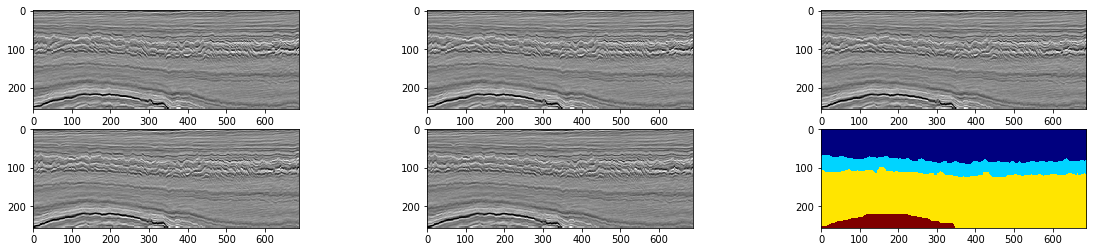

In [10]:
n_cols=3

fig, axs = plt.subplots(nrows=2, ncols=n_cols, figsize=(20,4))
for idx in range(6):
    if idx != 5:
          axs[idx//n_cols, idx%n_cols].imshow(x1[idx,:,:,0].T, cmap='gray')
    else:
          axs[idx//n_cols, idx%n_cols].imshow(np.argmax(y1,axis=-1).T, cmap='jet')